# Quadrupoles Excitation Curves Comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Extract data from FAC excitation files
_file_q20 = 'C:\\Users\\labimas\\Desktop\\Avaliação dos Efeitos de Ciclagem\\Medidas das curvas de excitação Quadrupolos Anel\\medidas_FAC_Q20.txt'
_file_q14 = 'C:\\Users\\labimas\\Desktop\\Avaliação dos Efeitos de Ciclagem\\Medidas das curvas de excitação Quadrupolos Anel\\medidas_FAC_Q14.txt'
_file_q30 = 'C:\\Users\\labimas\\Desktop\\Avaliação dos Efeitos de Ciclagem\\Medidas das curvas de excitação Quadrupolos Anel\\medidas_FAC_Q30.txt'

In [3]:
from db import DB
#filepath
_filepath = 'C:\\Arq\Work_At_LNLS\\eclipse-workspace\\rotating-coil-software\\Rotating Coil v3\\measurements_data.db'
_filepath = _filepath.replace("\\","//")

#Import database from SQlite
database = DB(filename=_filepath, dbtype='sqlite')

Indexing schema. This will take a second...finished!


In [4]:
def conversor_fac_files(file):
    _new_file = np.loadtxt(file, skiprows=7).T
    return _new_file

def creating_df(new_file, magnet_name, inverse=False):
    if inverse:
        new_file[3] = new_file[3]*(-1)
    _df = pd.DataFrame({
        'Current [A]': new_file[0],
        'Normal {} [T]'.format(str(magnet_name)) : new_file[3]
    })
    return _df

In [5]:
#Converting FAC files
_FAC_q20 = conversor_fac_files(_file_q20)
_FAC_q14 = conversor_fac_files(_file_q14)
_FAC_q30 = conversor_fac_files(_file_q30)

#Creating DataFrames from files converted
_df_fac_q20 = creating_df(_FAC_q20, 'quadrupole', False)
_df_fac_q14 = creating_df(_FAC_q14, 'quadrupole', True)
_df_fac_q30 = creating_df(_FAC_q30, 'quadrupole', False)

In [6]:
def overview_dataframe(new_fac_file, old_id0, old_idf, new_id0, new_idf):
    #Import from DB Q14 NEW excitation ramp
    _db_new_excitation = database.query("SELECT * from measurements WHERE (id >= {}) AND (id < {})".format(str(new_id0), 
                                                                                                                str(new_idf)))

    #Import from DB Q14 OLD excitation ramp
    _db_old_excitation = database.query("SELECT * from measurements WHERE (id >= {}) AND (id < {})".format(str(old_id0), 
                                                                                                                str(old_idf)))
    #Creating DataFrame with all quadrupole values (FAC, older excitation, new excitation)
    _df_excitation = pd.DataFrame({
        '1-Nominal Current [A]' : _db_old_excitation.main_current.iloc[0:12],
        '2-FAC excitation [T]': new_fac_file['Normal quadrupole [T]'].iloc[0:12],
        '3-Older excitation [T]' : _db_old_excitation.main_harmonic.iloc[0:12],
        '4-Newest excitation [T]': _db_new_excitation.main_harmonic.iloc[0:12]
    })
    _df_excitation.style.set_caption("Main Harmonic Quadrupole Excitation Relationship")
    
    #Adding excitation ratio
    _df_excitation['Newest / FAC (%)'] = abs((_df_excitation['4-Newest excitation [T]']) / abs(_df_excitation['2-FAC excitation [T]']))*100-100
    _df_excitation['Older / FAC (%)'] = abs((_df_excitation['3-Older excitation [T]']) / abs(_df_excitation['2-FAC excitation [T]']))*100-100
    _df_excitation
    return _df_excitation

In [7]:
def subplotting_excitation(_df, name):
    f, axarr = plt.subplots(3, sharex=True, figsize=(10, 10))
    axarr[0].plot(_df['1-Nominal Current [A]'], _df['2-FAC excitation [T]'], '-o')
    axarr[0].set_title('{} - FAC Excitation'.format(name))
    axarr[0].set_xlabel('Current [A]')
    axarr[0].set_ylabel('Normal quadrupole [T]', color='b')
    axarr[0].tick_params('y', colors='b')
    axarr[0].grid('on', alpha=0.3)

    axarr[1].plot(_df['1-Nominal Current [A]'], _df['3-Older excitation [T]'], '-ro')
    axarr[1].set_title('{} - Older Excitation - RotCoil'.format(name))
    axarr[1].set_xlabel('Current [A]')
    axarr[1].set_ylabel('Normal quadrupole [T]', color='r')
    axarr[1].tick_params('y', colors='r')
    axarr[1].grid('on', alpha=0.3)

    axarr[2].plot(_df['1-Nominal Current [A]'], _df['4-Newest excitation [T]'], '-go')
    axarr[2].set_title('{} - Newest Excitation - RotCoil'.format(name))
    axarr[2].set_xlabel('Current [A]')
    axarr[2].set_ylabel('Normal quadrupole [T]', color='g')
    axarr[2].tick_params('y', colors='g')
    axarr[2].grid('on', alpha=0.3)

    axarr[2].legend([axarr[0].get_lines()[0], axarr[1].get_lines()[0], axarr[2].get_lines()[0]],
               ['FAC','Older-Excitation (RC)','Newest-Excitation (RC)'], bbox_to_anchor=(1.3, 2.2))
    plt.subplots_adjust(hspace=0.8)
    plt.savefig('C:\\Users\\labimas\\Desktop\\Avaliação dos Efeitos de Ciclagem\\Medidas das curvas de excitação Quadrupolos Anel\\plot_comparison_'+str(name)+'.png')
    return plt.show()

In [8]:
def plot_fully(_df, name):
    plt.figure(figsize=(10,8))
    plt.title('{} - Excitation comparison'.format(name))
    plt.plot(_df['1-Nominal Current [A]'], _df['2-FAC excitation [T]'], '-o')
    plt.plot(_df['1-Nominal Current [A]'], _df['3-Older excitation [T]'], '-ro')
    plt.plot(_df['1-Nominal Current [A]'], _df['4-Newest excitation [T]'], '-go')
    plt.xlabel('Current [A]')
    plt.ylabel('Normal quadrupole [T]')
    plt.grid('on', alpha=0.3)
    plt.legend(['FAC','Older-Excitation (RC)','Newest-Excitation (RC)'])
    plt.savefig('C:\\Users\\labimas\\Desktop\\Avaliação dos Efeitos de Ciclagem\\Medidas das curvas de excitação Quadrupolos Anel\\plot_comparison_fully_'+str(name)+'.png')
    return plt.show()

## Q20 comparison

In [9]:
_q20_id0_old = 6458  #Q20-055 (2019)
_q20_idf_old = 6482

_q20_id0_new = 40209 #Q20-055 (2020)
_q20_idf_new = 40234

_q20_overview = overview_dataframe(_df_fac_q20, _q20_id0_old, _q20_idf_old, _q20_id0_new, _q20_idf_new)
#_q20_overview

In [10]:
dados = database.query("SELECT * from measurements WHERE (id >= {}) AND (id < {})".format(str(_q20_id0_old),str(_q20_idf_old)))
harmonicos = np.array([])
for i in range(len(dados)):
    valor = dados.read_data.iloc[i].split('\n')[2]
    harmonicos = np.append(harmonicos, valor.split('\t')[1])
harmonicos = np.asarray(harmonicos, dtype='float')

In [11]:
_q20_overview.drop(['3-Older excitation [T]'], axis=1, inplace=True)
_q20_overview.drop(['Older / FAC (%)'], axis=1, inplace=True)
_q20_overview.drop(['Newest / FAC (%)'], axis=1, inplace=True)

_q20_overview['3-Older excitation [T]'] = harmonicos[:12]
_q20_overview['Newest / FAC (%)'] = (_q20_overview['4-Newest excitation [T]'] / _df_fac_q20['Normal quadrupole [T]'].iloc[0:12])*100-100
_q20_overview['Older / FAC (%)'] = (_q20_overview['3-Older excitation [T]'] / _df_fac_q20['Normal quadrupole [T]'].iloc[0:12])*100-100
_q20_overview

,1-Nominal Current [A],2-FAC excitation [T],4-Newest excitation [T],3-Older excitation [T],Newest / FAC (%),Older / FAC (%)
0,0.0,0.00000,-0.043017,-0.040635,-inf,-inf
1,2.0,-0.15088,-0.154323,-0.150957,2.281677,0.050901
2,4.0,-0.26347,-0.266737,-0.263354,1.239990,-0.044066
3,6.0,-0.37681,-0.381109,-0.376563,1.141007,-0.065656
4,8.0,-0.49085,-0.495671,-0.490465,0.982179,-0.078517
5,10.0,-0.60553,-0.610645,-0.605033,0.844714,-0.082143
6,30.0,-1.77320,-1.775644,-1.771719,0.137804,-0.083521
7,50.0,-2.95580,-2.954016,-2.953629,-0.060346,-0.073449
8,70.0,-4.14000,-4.135054,-4.136582,-0.119462,-0.082560
9,90.0,-5.31950,-5.312134,-5.313668,-0.138465,-0.109634


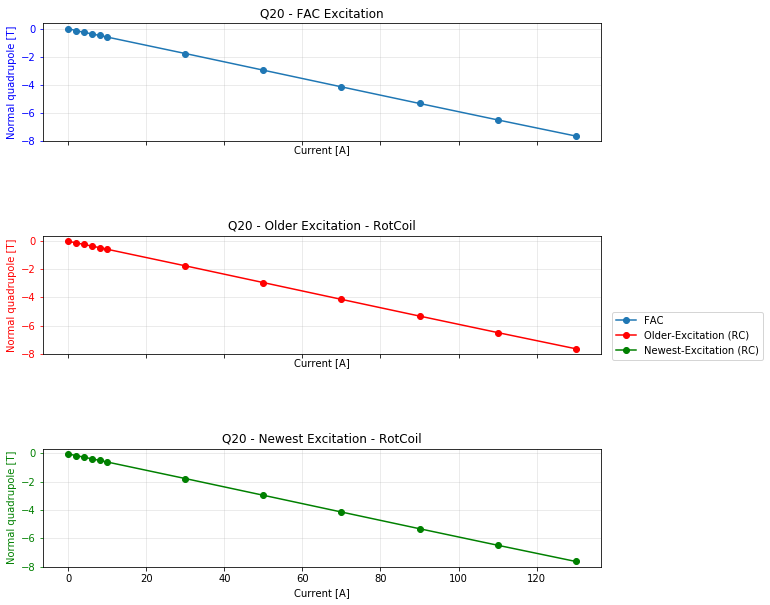

In [12]:
subplotting_excitation(_q20_overview, 'Q20')

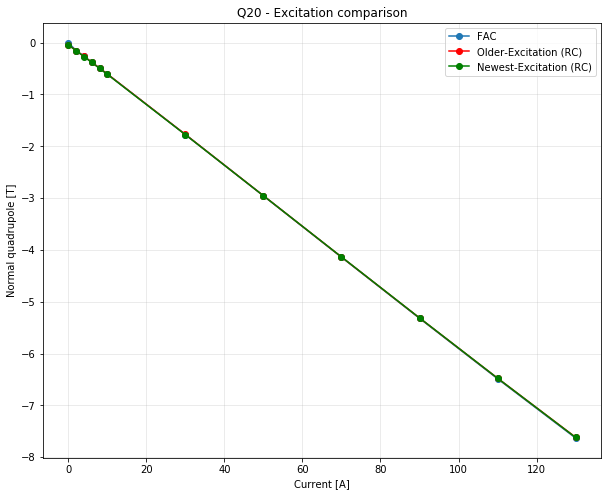

In [13]:
plot_fully(_q20_overview, 'Q20')

## Q14 comparison

In [14]:
_q14_id0_old = 31220   #Q14-003 (08/2019)
_q14_idf_old = 31244

_q14_id0_new = 40768   #Q14-003 (10/2020)
_q14_idf_new = 40792

_q14_overview = overview_dataframe(_df_fac_q14, _q14_id0_old, _q14_idf_old, _q14_id0_new, _q14_idf_new)
_q14_overview

,1-Nominal Current [A],2-FAC excitation [T],3-Older excitation [T],4-Newest excitation [T],Newest / FAC (%),Older / FAC (%)
0,0.0,-0.028641,-0.026289,-0.016185,-43.489587,-8.212829
1,2.0,-0.094995,-0.093991,-0.083805,-11.779483,-1.056802
2,4.0,-0.162910,-0.162355,-0.153009,-6.077818,-0.340424
3,6.0,-0.231350,-0.231146,-0.223135,-3.550742,-0.088094
4,8.0,-0.300260,-0.300326,-0.293627,-2.209131,0.022018
5,10.0,-0.369610,-0.369919,-0.364414,-1.405823,0.083672
6,30.0,-1.077700,-1.078285,-1.077224,-0.044137,0.054296
7,50.0,-1.796000,-1.795820,-1.790859,-0.286230,-0.009999
8,70.0,-2.514800,-2.514005,-2.505657,-0.363551,-0.031622
9,90.0,-3.229800,-3.229202,-3.218830,-0.339643,-0.018523


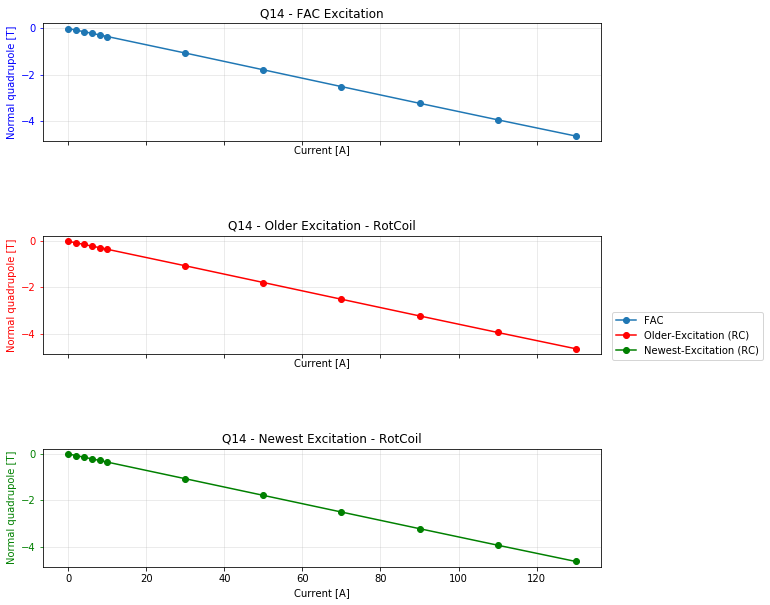

In [15]:
subplotting_excitation(_q14_overview, 'Q14')

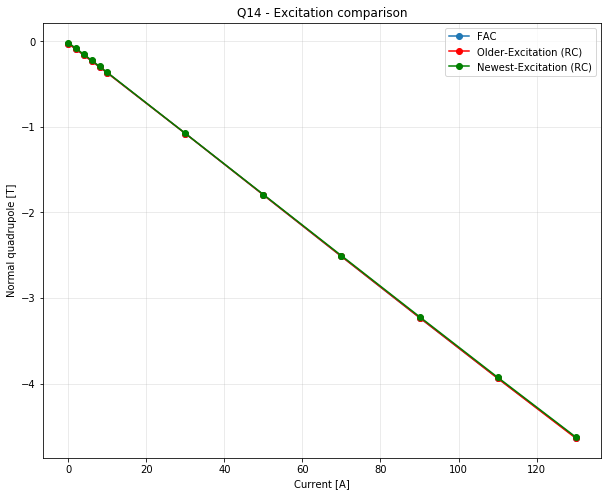

In [16]:
plot_fully(_q14_overview, 'Q14')

## Q30 - comparison

In [17]:
#Q30-010 (2018)
id0_old = 4236
idf_old = 4260

#Q30-002 (2020)
id0_new = 40533
idf_new = 40557

_df_q30 = overview_dataframe(_df_fac_q30, id0_old, idf_old, id0_new, idf_new)

In [18]:
dados = database.query("SELECT * from measurements WHERE (id >= {}) AND (id < {})".format(str(id0_old),str(idf_old)))
harmonicos = np.array([])
for i in range(len(dados)):
    valor = dados.read_data.iloc[i].split('\n')[2]
    harmonicos = np.append(harmonicos, valor.split('\t')[1])
harmonicos = np.asarray(harmonicos, dtype='float')

In [19]:
_df_q30.drop(['3-Older excitation [T]'], axis=1, inplace=True)
_df_q30.drop(['Older / FAC (%)'], axis=1, inplace=True)
_df_q30.drop(['Newest / FAC (%)'], axis=1, inplace=True)

_df_q30['3-Older excitation [T]'] = harmonicos[:12]
_df_q30['Newest / FAC (%)'] = (_df_q30['4-Newest excitation [T]'] / _df_fac_q30['Normal quadrupole [T]'].iloc[0:12])*100-100
_df_q30['Older / FAC (%)'] = (_df_q30['3-Older excitation [T]'] / _df_fac_q30['Normal quadrupole [T]'].iloc[0:12])*100-100
_df_q30

,1-Nominal Current [A],2-FAC excitation [T],4-Newest excitation [T],3-Older excitation [T],Newest / FAC (%),Older / FAC (%)
0,0.0,-0.057045,-0.051215,-0.056240,-10.220392,-1.410728
1,2.0,-0.224940,-0.221119,-0.224500,-1.698523,-0.195519
2,4.0,-0.395210,-0.393457,-0.395003,-0.443484,-0.052276
3,6.0,-0.566560,-0.568021,-0.566534,0.257817,-0.004571
4,8.0,-0.738900,-0.744267,-0.739003,0.726367,0.013886
5,10.0,-0.912200,-0.921038,-0.912408,0.968903,0.022835
6,30.0,-2.673900,-2.680205,-2.675050,0.235786,0.043008
7,50.0,-4.456200,-4.451799,-4.458046,-0.098758,0.041425
8,70.0,-6.241000,-6.226096,-6.243688,-0.238809,0.043070
9,90.0,-8.019900,-7.994126,-8.024513,-0.321375,0.057519


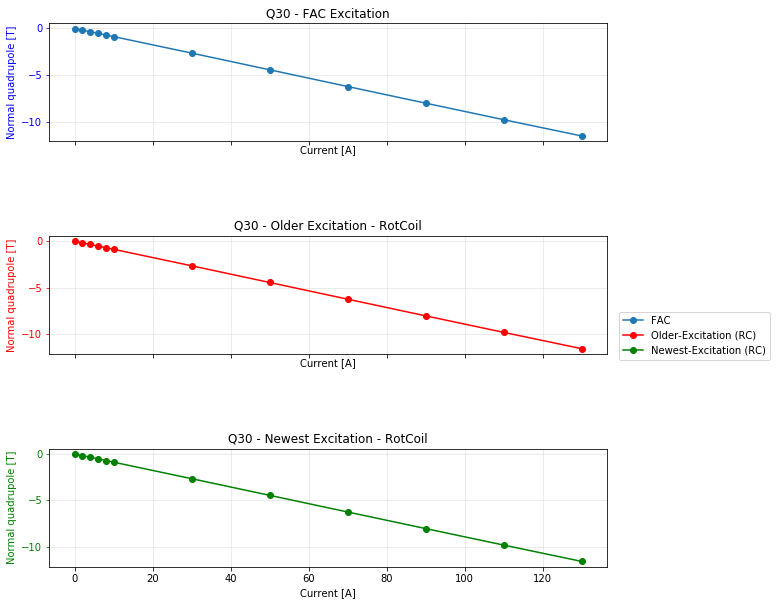

In [21]:
subplotting_excitation(_df_q30, 'Q30')

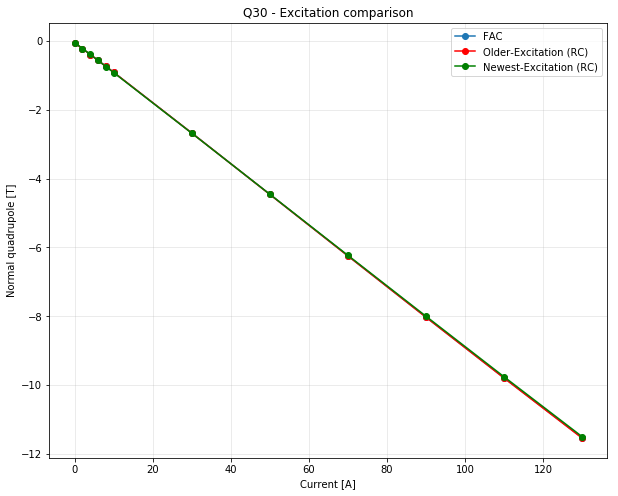

In [22]:
plot_fully(_df_q30, 'Q30')